# **Predictive Crime Mapping with a spatio-temporal kernel density estimation approach**

## **Case of study: Dallas City**

*Institute of Mathematical and Computational Engineering*

*School of Engineering*

*Pontifical Catholic University of Chile*

**Authors:** Christian Carstens, Mauro Mendoza, Francisco Tobar

**Date:** 2019-04-11

`Python version: 3.7`

### **DB Request**

In [49]:
import pandas as pd
from sodapy import Socrata

#import credentials as cre

In [50]:
with Socrata(cre.socrata_domain,
             cre.API_KEY_S,
             username=cre.USERNAME_S,
             password=cre.PASSWORD_S) as client:
    query = """
select
    incidentnum,
    geocoded_column,
    date1,
    time1,
    x_coordinate,
    y_cordinate
where
    geocoded_column is not null
    and date1 is not null
    and time1 is not null
    and x_coordinate is not null
    and y_cordinate is not null
limit
    50000
""" # 530000 max. 11/04

results = client.get(cre.socrata_dataset_identifier, query=query, content_type='json')
df = pd.DataFrame.from_records(results)
#df

### **DB Cleaning & Formatting**

In [51]:
#Se aplica después según tipo de mapa

### Plotting

In [52]:
import pandas as pd # Dataframes
import numpy as np # Arreglos

#import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as mc 
import matplotlib.pyplot as plt  

from scipy.stats import  gaussian_kde

from mpl_toolkits import mplot3d
import os
#from sklearn.datasets.samples_generator import make_blobs

# %config InlineBackend.figure_format ='retina'

In [53]:
dallas = gpd.read_file('Data/shapefiles/STREETS.shp')
crs = dallas.crs
crs

{'init': 'epsg:2276'}

### **By Year**

In [ ]:
df.loc[:, 'x_coordinate'] = df['x_coordinate'].apply(lambda x: float(x))
df.loc[:, 'y_cordinate'] = df['y_cordinate'].apply(lambda x: float(x))
df.loc[:, 'date1'] = df['date1'].apply(lambda x: x.split("-")[0])
df = df[['x_coordinate', 'y_cordinate', 'date1']]

df.rename(columns={'x_coordinate':'x', 'y_cordinate':'y', 'date1':'year'}, inplace=True)

In [47]:
# CREATE A LOOP TO MAKE MULTIPLE MAPS WITH YEAR ANNOTATIONS

# save all the maps in the charts folder
output_path = ''

# counter for the for loop
i = 0
# list of years (which are the column names at the moment)
list_of_years = ['2014','2015','2016','2017','2018','2019']

# set the min and max range for the choropleth map
vmin, vmax = 200, 1200

# start the for loop to create one map per year
for year in list_of_years:
    j= 0
    df2 = pd.DataFrame(columns=('x','y','year'))
    while j< len(df):
        incident = df.loc[j]
        if incident['year'] == year:
            df2.loc[len(df2)] = incident
        j += 1
        
    geometry = [Point(xy) for xy in zip(df2['x'], df2['y'])]
    geo_df = gpd.GeoDataFrame(df2,
                             crs = crs,
                             geometry = geometry)
    ax.set_facecolor('xkcd:black')

    nbins = 100
    data = np.array(df2[['x','y']])

    x, y = data.T
    k = gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi_2 = zi * 3000 * (10 ** 6)/(.304)

    cs = plt.contour(xi, yi, zi_2.reshape(xi.shape), cmap = 'jet')
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
    sm.set_array([])
    fig.colorbar(sm, ticks=cs.levels, shrink=.4, aspect=10)
    chart = fig.get_figure()




    fig, ax = plt.subplots(figsize = (15, 15))
    ax.set_facecolor('xkcd:black')

    dallas.plot(ax = ax, alpha = .4, color="gray")


    nbins = 100
    data = np.array(df2[['x','y']])

    k = gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    cmap2 = mpl.cm.get_cmap("jet")
    cmap2.set_under("k")

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=cmap2, vmin=.6e-10)
    fig.colorbar(sm, ticks=cs.levels, shrink=.4, aspect=10)
    ax.set_title(year, fontdict={'fontsize': '45', 'fontweight' : '12'})
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, year+'_year.png')
    #chart = fig.get_figure()
    plt.savefig(filepath, dpi=300)
    i+=1

KeyError: 'year'

### **By Month**

In [54]:
df.loc[:, 'x_coordinate'] = df['x_coordinate'].apply(lambda x: float(x))
df.loc[:, 'y_cordinate'] = df['y_cordinate'].apply(lambda x: float(x))
df.loc[:, 'date1'] = df['date1'].apply(lambda x: x.split("-")[1])
df = df[['x_coordinate', 'y_cordinate', 'date1']]

df.rename(columns={'x_coordinate':'x', 'y_cordinate':'y', 'date1':'month'}, inplace=True)

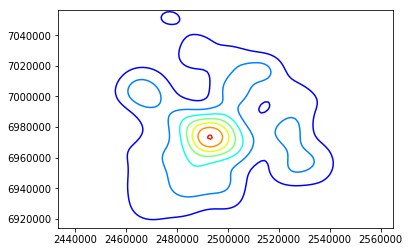

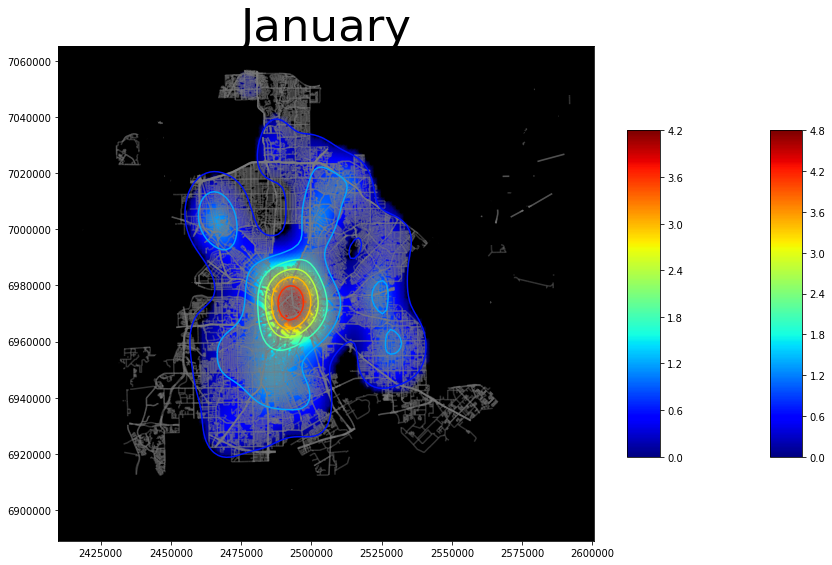

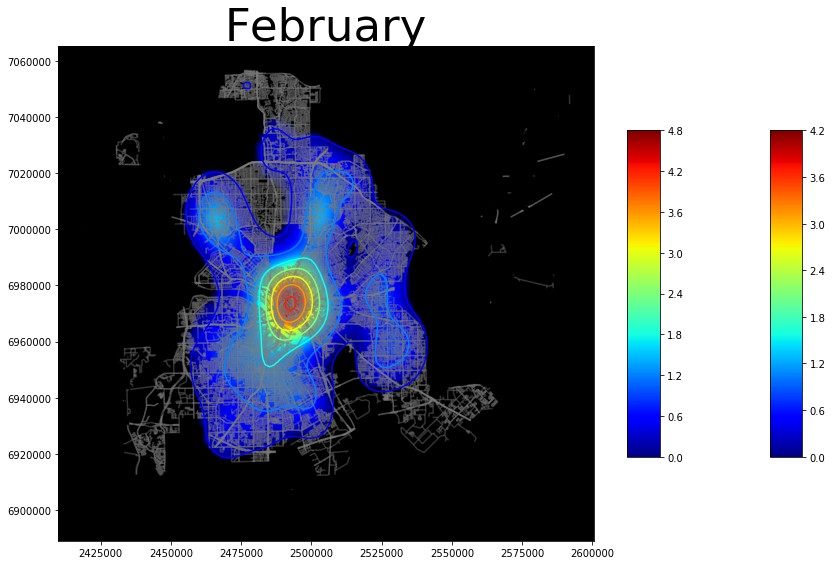

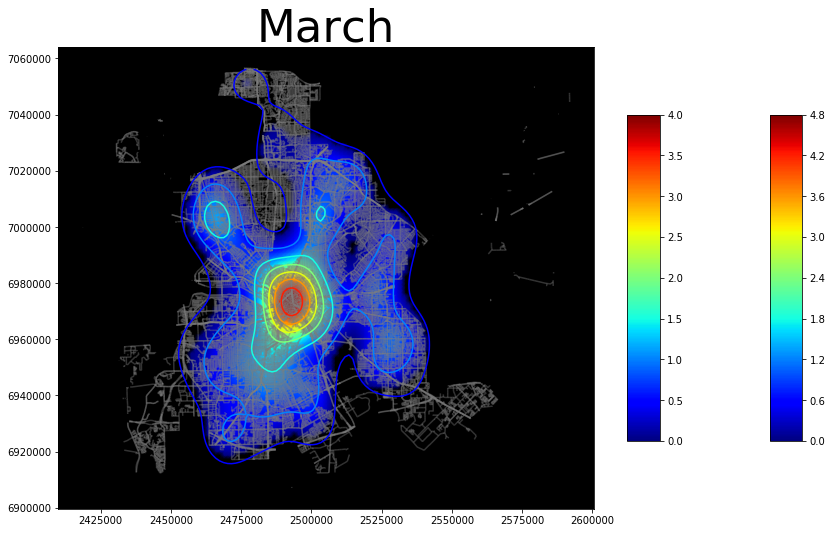

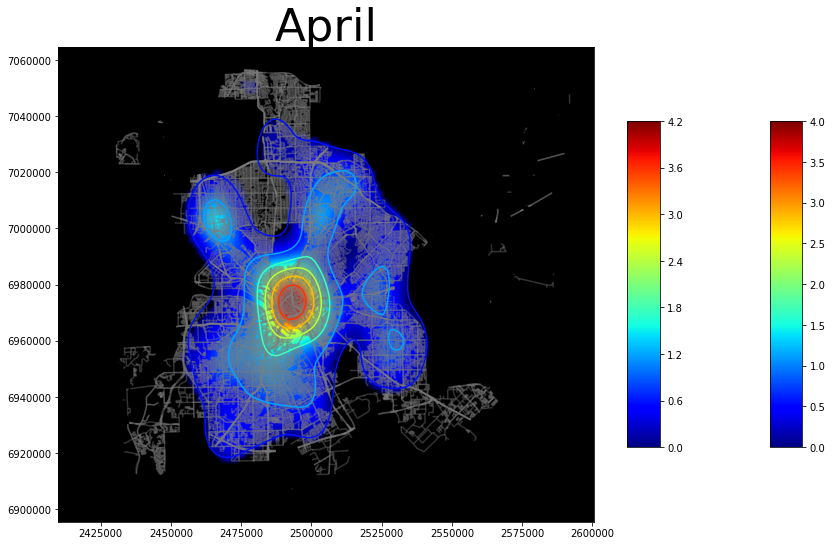

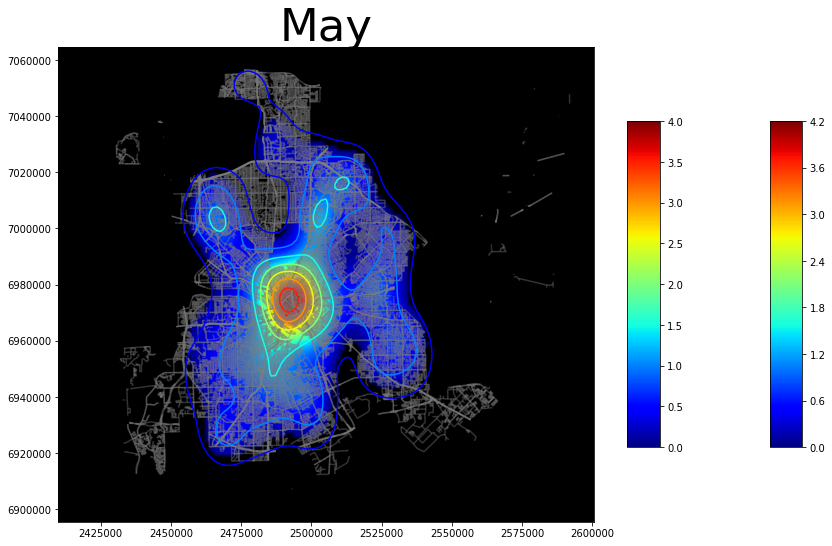

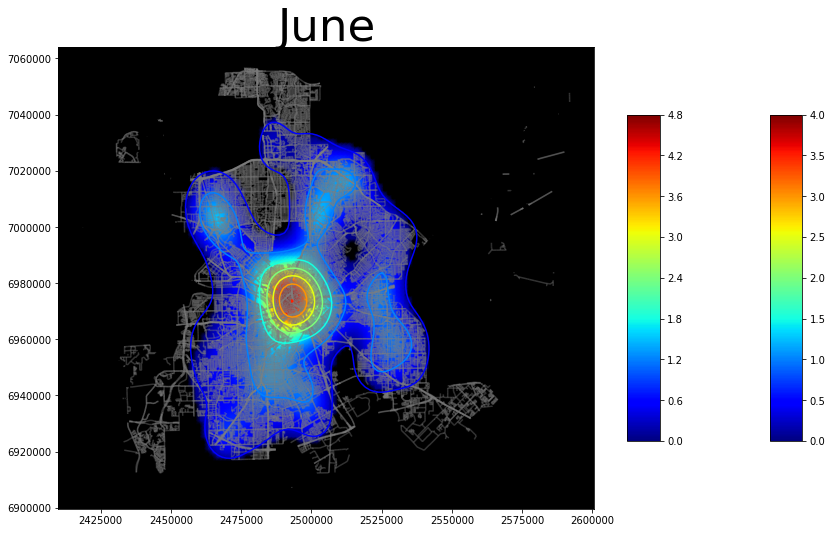

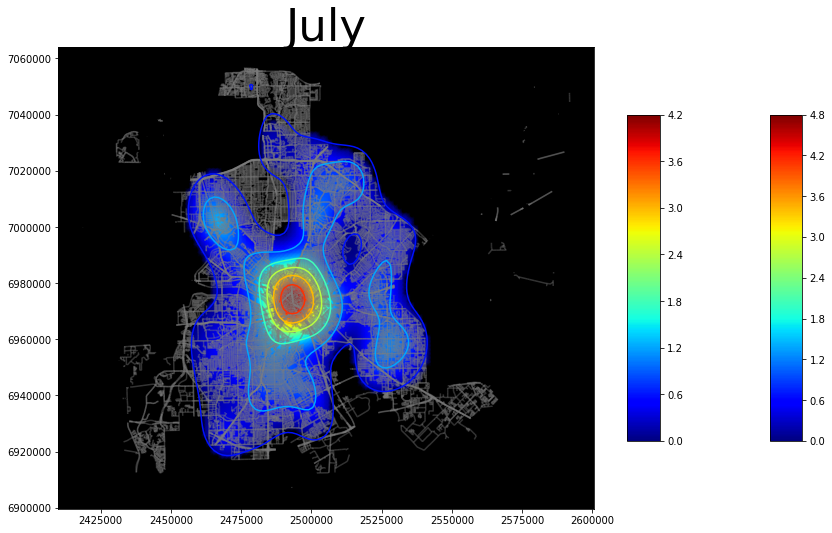

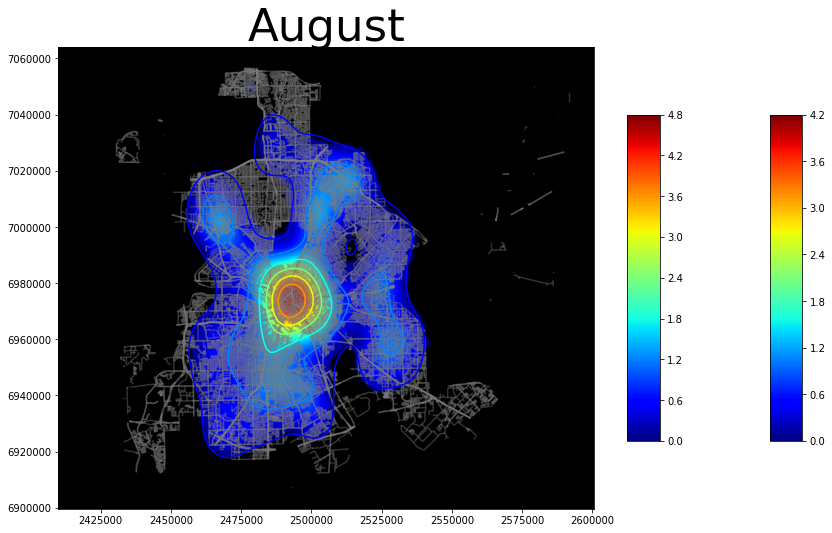

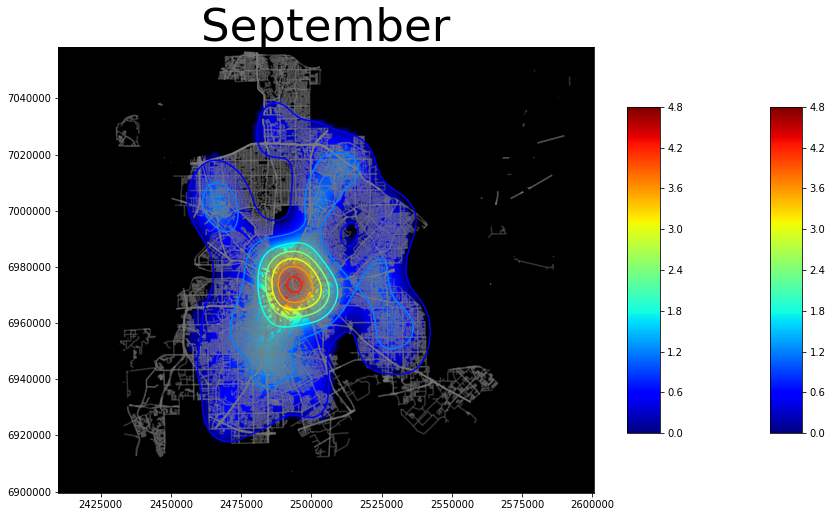

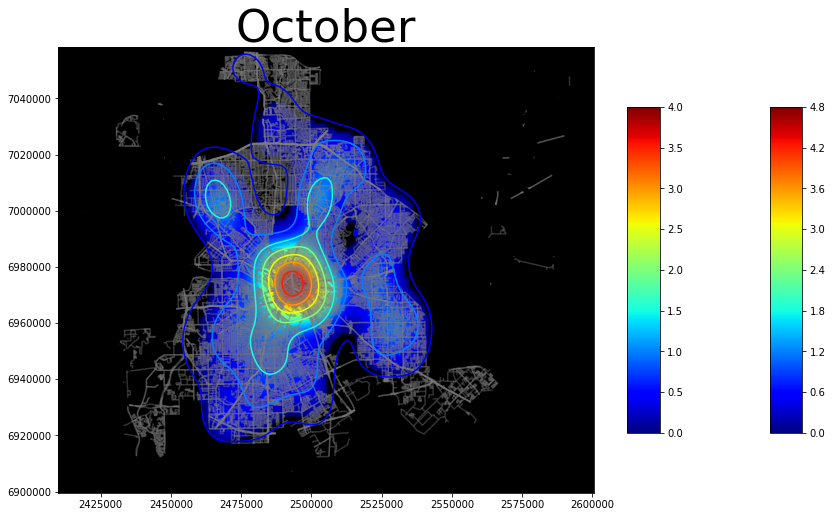

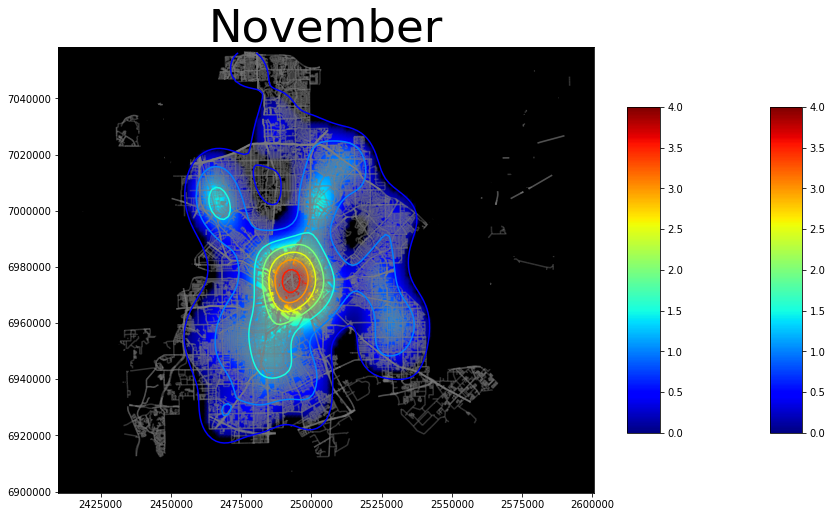

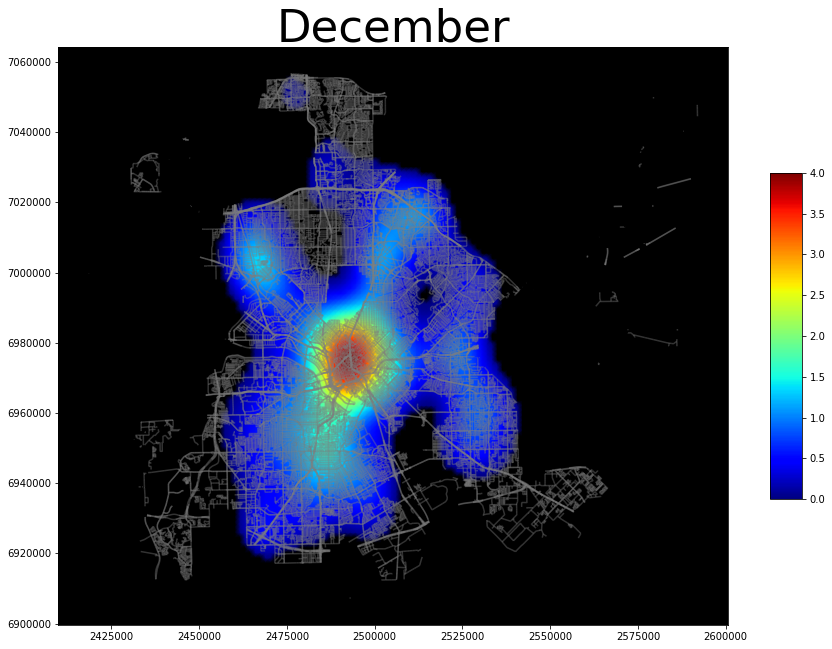

In [55]:
# CREATE A LOOP TO MAKE MULTIPLE MAPS WITH YEAR ANNOTATIONS

# save all the maps in the charts folder
output_path = ''

# counter for the for loop
i = 0
# list of years (which are the column names at the moment)
list_of_months = ['01','02','03','04','05','06', '07','08','09','10','11','12']

# set the min and max range for the choropleth map
vmin, vmax = 200, 1200

# start the for loop to create one map per year
for month in list_of_months:
    j= 0
    df2 = pd.DataFrame(columns=('x','y','month'))
    while j< len(df):
        incident = df.loc[j]
        if incident['month'] == month:
            df2.loc[len(df2)] = incident
        j += 1
        
    geometry = [Point(xy) for xy in zip(df2['x'], df2['y'])]
    geo_df = gpd.GeoDataFrame(df2,
                             crs = crs,
                             geometry = geometry)
    ax.set_facecolor('xkcd:black')

    nbins = 100
    data = np.array(df2[['x','y']])

    x, y = data.T
    k = gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    zi_2 = zi * 3000 * (10 ** 6)/(.304)

    cs = plt.contour(xi, yi, zi_2.reshape(xi.shape), cmap = 'jet')
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=cs.cvalues.min(), vmax=cs.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
    sm.set_array([])
    fig.colorbar(sm, ticks=cs.levels, shrink=.4, aspect=10)
    #chart = fig.get_figure()




    fig, ax = plt.subplots(figsize = (15, 15))
    ax.set_facecolor('xkcd:black')

    dallas.plot(ax = ax, alpha = .4, color="gray")


    nbins = 100
    data = np.array(df2[['x','y']])

    k = gaussian_kde(data.T)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    cmap2 = mpl.cm.get_cmap("jet")
    cmap2.set_under("k")

    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=cmap2, vmin=.6e-10)
    fig.colorbar(sm, ticks=cs.levels, shrink=.4, aspect=10)
    months_names= {"01":"January", "02":"February","03":"March", "04": "April", "05": "May", "06": "June", "07": "July", "08": "August", "09": "September", "10": "October", "11": "November", "12": "December"}
    ax.set_title(months_names[month], fontdict={'fontsize': '45', 'fontweight' : '12'})
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, months_names[month]+'.png')
    #chart = fig.get_figure()
    plt.savefig(filepath, dpi=300)
    i+=1

### **Save gif by month**

In [56]:
from apng import APNG
APNG.from_files(['January.png', 'February.png', 'March.png', 'April.png', 'May.png', 'June.png', 'July.png', 'August.png', 'September.png', 'October.png', 'November.png', 'December.png'], 
                 delay=1000).save('map_month.gif')

### **Save gif by year**

In [25]:
from apng import APNG
APNG.from_files(['2014_year.png', '2015_year.png', '2016_year.png', '2017_year.png', '2018_year.png', '2019_year.png',], 
                 delay=1000).save('map_year.gif')